# Training models - Linear Regression

## Normal equation

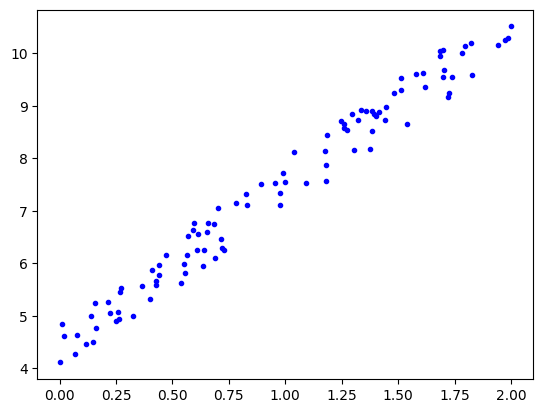

In [25]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)

plt.plot(X, y, "b.")

In [26]:
X_b = np.c_[np.ones((100, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).T.dot(X_b.T).dot(y)
theta_best

array([[4.42164556],
       [3.10224148]])

In [27]:
X_new = np.array([[0], [2]])
print(X_new)
X_new_b = np.c_[np.ones((2,1)), X_new]
print(X_new_b)

y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]
[[ 4.42164556]
 [10.62612852]]


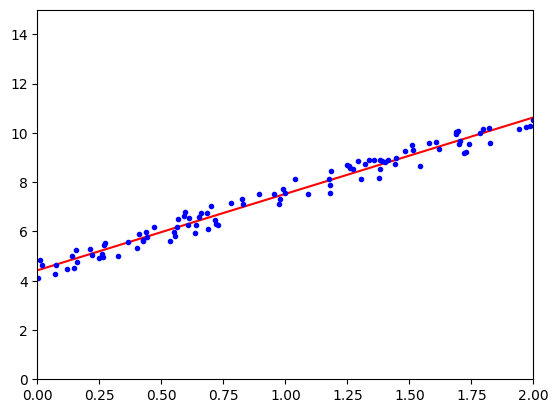

In [28]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0., 2., 0., 15.])
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.42164556]), array([[3.10224148]]))

In [30]:
lin_reg.predict(X_new)

array([[ 4.42164556],
       [10.62612852]])

## Batch gradient descent

In [31]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2,1)

for it in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.42164556],
       [3.10224148]])

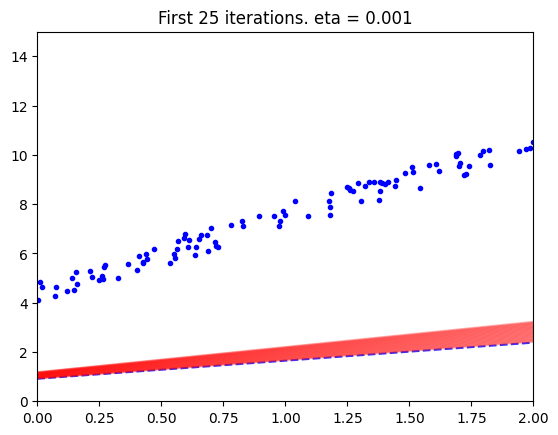

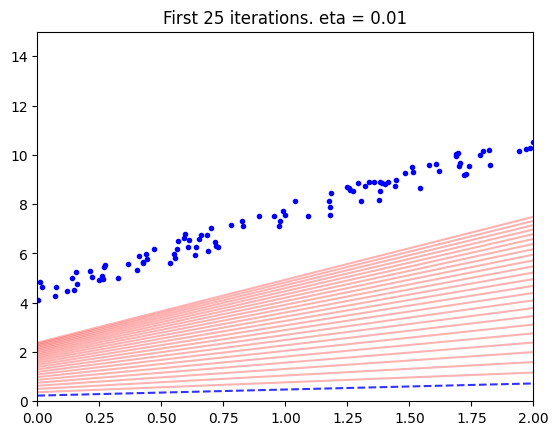

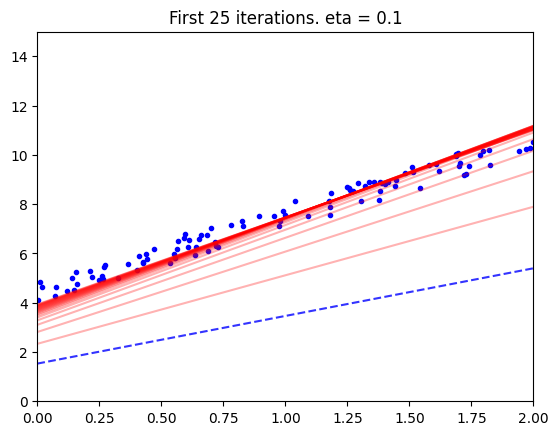

In [32]:
# Plot the resulting line with different learning rates. Starting line is red dashed. Try with 1e-2, 1e-1, 0.5, 1.0. One plot per learning rate. Plot only 10 first iterations.
from matplotlib import pyplot as plt

etas = [1e-3, 1e-2, 1e-1]
for eta in etas:
    theta = np.random.rand(2,1)
    plt.plot(X, y, "b.")
    for it in range(25):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        y_predict = X_new_b.dot(theta)
        if it == 0:
            plt.plot(X_new, y_predict, "b--", alpha=.8)
        else:
            plt.plot(X_new, y_predict, "r-", alpha=.3)
        plt.title("First 25 iterations. eta = " + str(eta))
    plt.axis([0., 2., 0., 15.])
    plt.show()

## Stochastic gradient descent

In [33]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients

theta

array([[4.44242634],
       [3.09565064]])

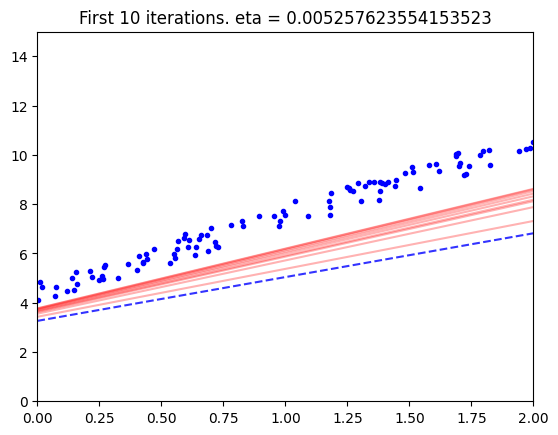

In [34]:
# Plot the first 10 iterations of the stochastic gradient descent with learning rate 0.1. Plot only 10 first iterations.

n_epochs = 50
theta = np.random.randn(2,1)
plt.plot(X, y, "b.")
for it in range(10):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(it * m + 1)
    theta = theta - eta * gradients
    y_predict = X_new_b.dot(theta)
    if it == 0:
        plt.plot(X_new, y_predict, "b--", alpha=.8)
    else:
        plt.plot(X_new, y_predict, "r-", alpha=.3)
    plt.title("First 10 iterations. eta = " + str(eta))

plt.axis([0., 2., 0., 15.])
plt.show()

In [35]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.42092498]), array([3.10583299]))

## Polynomial regression

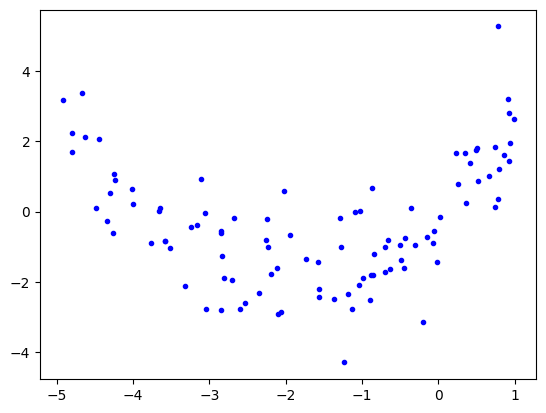

In [36]:
m = 100
X = 6 * np.random.rand(m, 1) - 5
y = 0.5 * X**2 + X * 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(
    degree = 2,
    include_bias=False
)

X_poly = poly_features.fit_transform(X)
X_poly[0]

array([-1.28357143,  1.64755562])

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.05195443]), array([[1.91461702, 0.49935404]]))

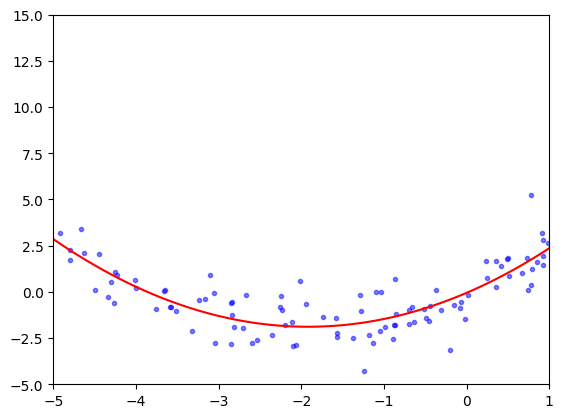

In [39]:
# Plot same as above but with polynomial regression. Move graph to show the curve.
plt.plot(X, y, "b.", alpha=.5)
X_new = np.linspace(-5, 1, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, "r-")
plt.axis([-5, 1, -5, 15])
plt.show()


In [40]:
# Plot learning curves

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r+-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    

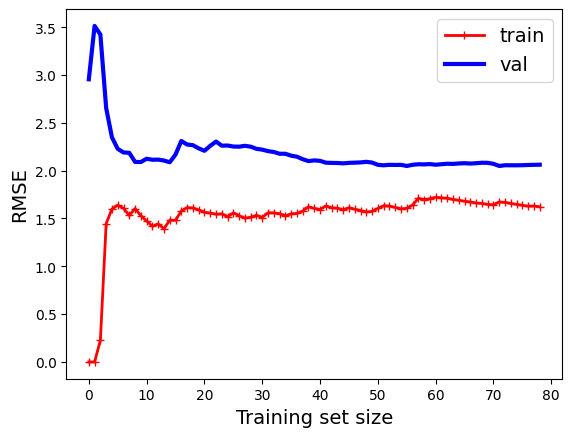

In [41]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

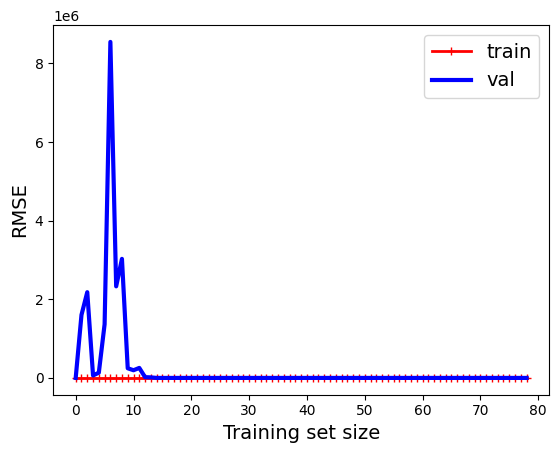

In [42]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)

## Regularized models

### Ridge regression

In [43]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[-0.03703418]])

In [44]:
# SGDRegressor with Ridge regularization

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


array([0.01233679])

### Lasso regression

In [45]:
# Lasso regression subgradient vector

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([-0.14022277])

### Elastic Net

In [46]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([-0.09229329])

### Early stopping

# Logistic regression

In [55]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [59]:
iris["data"][0:4, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [62]:
iris["target"][0:4]

array([0, 0, 0, 0])

In [67]:
X = iris["data"]
y = (iris["target"] == 2).astype(np.int32)

In [68]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)